# CODER HOUSE
##Data Science II: Fundamentos para la Ciencia de Datos

#### Domingo 04/05/2025

#### Trabajo Final

#### Comisión 61725

#### Profesor Jorge Ruiz, tutor Luciano Lisachi


#### Patricio Emmanuel Dueñas

##Introduccion
-El data set sera formado usando la libreria de Python "LanusStasts" que recopila datos estadisticos de varios sitios web dedicados al Futbol.

-La idea en principio es armar un mecanismo por el cual se pueda predecir si un jugador de futbol es un delantero o no es un delantero dentro de la tactica del futbol profecional.

##Hipotesis

La hipotesis es que a atraves de los algoritmos Random Forest y Arbol de Desicion se puede predecir en un data set de jugadores de futbol y sus estadisitcas si se trata de un delantero o no y se trata de otra variante tactica.

### Importo librerias


In [1]:
pip install --upgrade LanusStats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 22.8 MB/s eta 0:00:00
  Created wheel for undetected-chromedriver: filename=undetected_chromedriver-3.5.5-py3-none-any.whl size=47047 sha256=72c359cfec8bb38153dc0b0dfe936c7387b24885b09fe174cd3184047fc23610
  Stored in directory: /root/.cache/pip/wheels/5c/b9/03/4b6e38f019d6170e8c25df2e1e362d7bdf9ff4012df2dc85c0
Successfully built undetected-chromedriver


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import LanusStats as ls
import matplotlib.pyplot as plt

In [3]:
pd.set_option ('display.max_rows', 11)

###Import Data Sets

In [4]:
fbref = ls.Fbref()
ls.get_available_season_for_leagues ('Fbref', 'Primera Division Argentina')

{'id': 21,
 'slug': 'Primera-Division',
 'seasons': {'2021', '2022', '2023', '2024', '2025'}}

In [5]:
df= fbref.get_all_player_season_stats ('Primera Division Argentina','2023')

stats
Starting to scrape player data from Fbref...
keepers
Starting to scrape player data from Fbref...
keepersadv
Starting to scrape player data from Fbref...
shooting
Starting to scrape player data from Fbref...
passing
Starting to scrape player data from Fbref...
passing_types
Starting to scrape player data from Fbref...
gca
Starting to scrape player data from Fbref...
defense
Starting to scrape player data from Fbref...
possession
Starting to scrape player data from Fbref...
playingtime
Starting to scrape player data from Fbref...
misc
Starting to scrape player data from Fbref...


In [6]:
df_players = df[0]

In [7]:
df_players.head(8)

,Player,stats_Nation,stats_Pos,stats_Squad,stats_Comp,stats_Age,stats_Born,stats_MP,stats_Starts,stats_Min,...,misc_Crs,misc_Int,misc_TklW,misc_PKwon,misc_PKcon,misc_OG,misc_Recov,misc_Won,misc_Lost,misc_Won%
0,Ramón Ábila,ar ARG,FW,Colón,Primera Division Argentina,33,1989,25,17,"1,571",...,3,5,4,1,0,0,28,12,19,38.7
1,Gonzalo Abrego,ar ARG,MF,Godoy Cruz,Primera Division Argentina,23,2000,26,26,"2,134",...,20,21,30,0,0,0,161,35,56,38.5
2,Jonás Acevedo,ar ARG,"MF,FW",Huracán,Primera Division Argentina,25,1997,16,10,849,...,80,5,8,0,0,0,47,6,14,30.0
3,Lucas Acevedo,ar ARG,DF,Colón,Primera Division Argentina,31,1991,6,2,189,...,0,0,3,0,0,0,11,14,5,73.7
4,Guillermo Acosta,ar ARG,MF,Atlé Tucumán,Primera Division Argentina,34,1988,25,23,"1,874",...,11,26,29,0,1,0,166,28,24,53.8
5,Lautaro Acosta,ar ARG,MF,Lanús,Primera Division Argentina,34,1988,19,12,932,...,10,8,13,2,0,0,62,22,20,52.4
6,Lucas Acosta,ar ARG,GK,Lanús,Primera Division Argentina,27,1995,18,18,"1,620",...,0,1,0,0,0,0,8,1,1,50.0
7,Tomás Adoryán,ar ARG,MF,Banfield,Primera Division Argentina,21,2001,2,0,39,...,2,0,0,0,0,0,2,2,1,66.7


In [8]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Columns: 238 entries, Player to misc_Won%
dtypes: object(238)
memory usage: 1.5+ MB


In [9]:
df_players.shape

(825, 238)

In [10]:
df_players.describe()

,Player,stats_Nation,stats_Pos,stats_Squad,stats_Comp,stats_Age,stats_Born,stats_MP,stats_Starts,stats_Min,...,misc_Crs,misc_Int,misc_TklW,misc_PKwon,misc_PKcon,misc_OG,misc_Recov,misc_Won,misc_Lost,misc_Won%
count,825,825,825,825,825,825,825,825,825,825,...,825,825,825,825,825,825,825,825,825,825
unique,819,17,10,28,1,28,28,27,28,639,...,104,52,53,4,3,2,184,87,79,288
top,Nicolás Fernández,ar ARG,DF,Racing Club,Primera Division Argentina,22,2000,1,0,"2,340",...,0,0,0,0,0,0,1,0,0,50.0
freq,2,698,235,36,825,75,85,67,116,9,...,180,184,107,761,723,806,32,95,94,54


In [11]:
df_players.isna().sum()

,0
Player,0
stats_Nation,0
stats_Pos,0
stats_Squad,0
stats_Comp,0
...,...
misc_OG,0
misc_Recov,0
misc_Won,0
misc_Lost,0


In [13]:
ls.get_available_leagues('Fbref')

['Copa de la Liga',
 'Primera Division Argentina',
 'Primera Division Uruguay',
 'Brasileirao',
 'Brasileirao B',
 'Primera Division Colombia',
 'Primera Division Chile',
 'Primera Division Peru',
 'Primera Division Venezuela',
 'Primera Division Ecuador',
 'Primera Division Bolivia',
 'Primera Division Paraguay',
 'Brasileirao F',
 'MLS',
 'USL Championship',
 'Premier League',
 'La Liga',
 'Ligue 1',
 'Bundesliga',
 'Serie A',
 'Big 5 European Leagues',
 'Danish Superliga',
 'Eredivise',
 'Primeira Liga Portugal',
 'Copa America',
 'Euros',
 'Saudi League',
 'EFL Championship',
 'La Liga 2',
 'Belgian Pro League',
 'Challenger Pro League',
 '2. Bundesliga',
 'Ligue 2',
 'Serie B',
 'J1 League',
 'NSWL',
 'Wowens Super League',
 'Liga F',
 'Premier Division South Africa',
 'Champions League',
 'Europa League',
 'Conference League',
 'Copa Libertadores',
 'Liga MX']

In [14]:
fbref = ls.Fbref()
ls.get_available_season_for_leagues ('Fbref', 'Brasileirao')

{'id': 24,
 'slug': 'Serie-A',
 'seasons': {'2021', '2022', '2023', '2024', '2025'}}

In [15]:
df1= fbref.get_all_player_season_stats ('Brasileirao','2023')

stats
Starting to scrape player data from Fbref...
keepers
Starting to scrape player data from Fbref...
keepersadv
Starting to scrape player data from Fbref...
shooting
Starting to scrape player data from Fbref...
passing
Starting to scrape player data from Fbref...
passing_types
Starting to scrape player data from Fbref...
gca
Starting to scrape player data from Fbref...
defense
Starting to scrape player data from Fbref...
possession
Starting to scrape player data from Fbref...
playingtime
Starting to scrape player data from Fbref...
misc
Starting to scrape player data from Fbref...


In [16]:
df_players1= df1[0]

In [17]:
df_players1.head(8)

,Player,stats_Nation,stats_Pos,stats_Squad,stats_Comp,stats_Age,stats_Born,stats_MP,stats_Starts,stats_Min,...,misc_Crs,misc_Int,misc_TklW,misc_PKwon,misc_PKcon,misc_OG,misc_Recov,misc_Won,misc_Lost,misc_Won%
0,Nicolás Acevedo,uy URU,MF,Bahia,Brasileirao,23,1999,31,21,"1,970",...,12,27,46,0,0,0,174,22,29,43.1
1,Luiz Adriano,br BRA,FW,Internacional,Brasileirao,35,1987,29,17,"1,330",...,0,9,7,0,0,0,30,25,33,43.1
2,Adriel,br BRA,GK,Grêmio,Brasileirao,22,2001,2,2,180,...,0,0,0,0,0,0,3,0,0,0
3,Adryelson,br BRA,DF,Botafogo (RJ),Brasileirao,24,1998,35,35,"2,996",...,0,61,20,0,0,0,127,92,45,67.2
4,Adson,br BRA,"FW,MF",Corinthians,Brasileirao,22,2000,15,9,857,...,10,8,26,0,0,0,52,7,4,63.6
5,Adyson,br BRA,"FW,MF",América (MG),Brasileirao,17,2005,8,1,245,...,31,5,5,0,0,0,16,0,0,0
6,Washington Aguerre,uy URU,GK,América (MG),Brasileirao,29,1993,2,2,180,...,0,0,0,0,0,0,0,0,0,0
7,Carlos Alberto,br BRA,"FW,MF",Botafogo (RJ),Brasileirao,20,2002,15,1,296,...,5,1,0,1,0,0,14,4,7,36.4


In [18]:
df_players1.shape

(748, 238)

In [19]:
ls.get_available_season_for_leagues('Fbref','MLS')

{'id': 22,
 'slug': 'Major-League-Soccer',
 'seasons': {'2021', '2022', '2023', '2024', '2025'}}

In [20]:
df2= fbref.get_all_player_season_stats ('MLS','2023')

stats
Starting to scrape player data from Fbref...
keepers
Starting to scrape player data from Fbref...
keepersadv
Starting to scrape player data from Fbref...
shooting
Starting to scrape player data from Fbref...
passing
Starting to scrape player data from Fbref...
passing_types
Starting to scrape player data from Fbref...
gca
Starting to scrape player data from Fbref...
defense
Starting to scrape player data from Fbref...
possession
Starting to scrape player data from Fbref...
playingtime
Starting to scrape player data from Fbref...
misc
Starting to scrape player data from Fbref...


In [21]:
df_players2= df2[0]

In [22]:
df_players2.shape

(855, 238)

In [23]:
fbref = ls.Fbref()
ls.get_available_season_for_leagues ('Fbref', 'Liga MX')

{'id': 31,
 'slug': 'Liga-MX',
 'seasons': {'2018-2019',
  '2019-2020',
  '2020-2021',
  '2021-2022',
  '2022-2023',
  '2023-2024',
  '2024-2025'}}

In [24]:
df3= fbref.get_all_player_season_stats ('Liga MX','2022-2023')

stats
Starting to scrape player data from Fbref...
keepers
Starting to scrape player data from Fbref...
keepersadv
Starting to scrape player data from Fbref...
shooting
Starting to scrape player data from Fbref...
passing
Starting to scrape player data from Fbref...
passing_types
Starting to scrape player data from Fbref...
gca
Starting to scrape player data from Fbref...
defense
Starting to scrape player data from Fbref...
possession
Starting to scrape player data from Fbref...
playingtime
Starting to scrape player data from Fbref...
misc
Starting to scrape player data from Fbref...


In [25]:
df_players3= df3[0]

In [26]:
df_players3.shape

(586, 238)

##Uniendo los datos de diferentes ligas se forma el dataframe final.

In [27]:
dfx = pd.concat([df_players, df_players1, df_players2,df_players3], ignore_index=True)
print(dfx)

                  Player stats_Nation stats_Pos   stats_Squad  \
0            Ramón Ábila       ar ARG        FW         Colón   
1         Gonzalo Abrego       ar ARG        MF    Godoy Cruz   
2          Jonás Acevedo       ar ARG     MF,FW       Huracán   
3          Lucas Acevedo       ar ARG        DF         Colón   
4       Guillermo Acosta       ar ARG        MF  Atlé Tucumán   
...                  ...          ...       ...           ...   
3009      Ángel Zaldívar       mx MEX        FW   Guadalajara   
3010      Edgar Zaldívar       mx MEX        MF         Atlas   
3011        Ángel Zapata       mx MEX        MF     Monterrey   
3012  Alejandro Zendejas       us USA     FW,MF       América   
3013         José Zúñiga       co COL        FW     Querétaro   

                      stats_Comp stats_Age stats_Born stats_MP stats_Starts  \
0     Primera Division Argentina        33       1989       25           17   
1     Primera Division Argentina        23       2000       2

In [28]:
list(dfx.columns)

['Player',
 'stats_Nation',
 'stats_Pos',
 'stats_Squad',
 'stats_Comp',
 'stats_Age',
 'stats_Born',
 'stats_MP',
 'stats_Starts',
 'stats_Min',
 'stats_90s',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_PK',
 'stats_PKatt',
 'stats_CrdY',
 'stats_CrdR',
 'stats_xG',
 'stats_npxG',
 'stats_xAG',
 'stats_npxG+xAG',
 'stats_PrgC',
 'stats_PrgP',
 'stats_PrgR',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_G+A-PK',
 'stats_xG',
 'stats_xAG',
 'stats_xG+xAG',
 'stats_npxG',
 'stats_npxG+xAG',
 'shooting_Nation',
 'shooting_Pos',
 'shooting_Squad',
 'shooting_Comp',
 'shooting_Age',
 'shooting_Born',
 'shooting_90s',
 'shooting_Gls',
 'shooting_Sh',
 'shooting_SoT',
 'shooting_SoT%',
 'shooting_Sh/90',
 'shooting_SoT/90',
 'shooting_G/Sh',
 'shooting_G/SoT',
 'shooting_Dist',
 'shooting_FK',
 'shooting_PK',
 'shooting_PKatt',
 'shooting_xG',
 'shooting_npxG',
 'shooting_npxG/Sh',
 'shooting_G-xG',
 'shooting_np:G-xG',
 'passing_Nation',
 'passing_Pos'

In [29]:
from google.colab import files

In [30]:
dfx.to_csv('mi_dataframe.csv', index=False)

In [38]:
dfx

,Player,stats_Nation,stats_Pos,stats_Squad,stats_Comp,stats_Age,stats_Born,stats_MP,stats_Starts,stats_Min,...,misc_Crs,misc_Int,misc_TklW,misc_PKwon,misc_PKcon,misc_OG,misc_Recov,misc_Won,misc_Lost,misc_Won%
0,Ramón Ábila,ar ARG,FW,Colón,Primera Division Argentina,33,1989,25,17,"1,571",...,3,5,4,1,0,0,28,12,19,38.7
1,Gonzalo Abrego,ar ARG,MF,Godoy Cruz,Primera Division Argentina,23,2000,26,26,"2,134",...,20,21,30,0,0,0,161,35,56,38.5
2,Jonás Acevedo,ar ARG,"MF,FW",Huracán,Primera Division Argentina,25,1997,16,10,849,...,80,5,8,0,0,0,47,6,14,30.0
3,Lucas Acevedo,ar ARG,DF,Colón,Primera Division Argentina,31,1991,6,2,189,...,0,0,3,0,0,0,11,14,5,73.7
4,Guillermo Acosta,ar ARG,MF,Atlé Tucumán,Primera Division Argentina,34,1988,25,23,"1,874",...,11,26,29,0,1,0,166,28,24,53.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,Ángel Zaldívar,mx MEX,FW,Guadalajara,Liga MX,28,1994,14,11,761,...,2,3,8,0,0,0,25,19,29,39.6
3010,Edgar Zaldívar,mx MEX,MF,Atlas,Liga MX,25,1996,28,19,"1,647",...,10,20,18,0,0,0,91,23,18,56.1
3011,Ángel Zapata,mx MEX,MF,Monterrey,Liga MX,21,2001,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3012,Alejandro Zendejas,us USA,"FW,MF",América,Liga MX,24,1998,28,25,"1,861",...,90,20,26,0,0,0,120,10,16,38.5


In [39]:
Jug_duplicados = dfx[dfx.duplicated(subset='Player', keep=False)]                         #Identifico y ordeno los jugadores que figuran mas de una vez

print(Jug_duplicados)

                Player stats_Nation stats_Pos       stats_Squad  \
12    Emanuel Aguilera       ar ARG        DF             Tigre   
50         Julián Aude       ar ARG        DF             Lanús   
53        Tomás Avilés       ar ARG     DF,MF       Racing Club   
59       David Barbona       ar ARG     MF,FW    Defensa y Just   
86       Lucas Besozzi       ar ARG     MF,FW  Cen. Córdoba–SdE   
...                ...          ...       ...               ...   
3002           Vitinho       br BRA     FW,MF          Atlético   
3004    Facundo Waller       uy URU     FW,MF          Atlético   
3005    Facundo Waller       uy URU     MF,FW            Puebla   
3008    Ángel Zaldívar       mx MEX        FW          Atlético   
3009    Ángel Zaldívar       mx MEX        FW       Guadalajara   

                      stats_Comp stats_Age stats_Born stats_MP stats_Starts  \
12    Primera Division Argentina        33       1989       16           14   
50    Primera Division Argentina     

In [40]:
duplicados_ordenados = Jug_duplicados.sort_values(by='Player')

print(duplicados_ordenados)

              Player stats_Nation stats_Pos       stats_Squad  \
774     Agustín Urzi       ar ARG        MF          Banfield   
2976    Agustín Urzi       ar ARG     MF,FW         FC Juárez   
1072     Alan Franco       ar ARG        DF         São Paulo   
276      Alan Franco       ec ECU        MF          Talleres   
1071     Alan Franco       ec ECU     MF,FW  Atlético Mineiro   
...              ...          ...       ...               ...   
1438    Ángel Romero       py PAR        FW       Corinthians   
3008  Ángel Zaldívar       mx MEX        FW          Atlético   
3009  Ángel Zaldívar       mx MEX        FW       Guadalajara   
467   Ángelo Martino       ar ARG     DF,MF       Newell's OB   
468   Ángelo Martino       ar ARG        DF          Talleres   

                      stats_Comp stats_Age stats_Born stats_MP stats_Starts  \
774   Primera Division Argentina        22       2000        1            1   
2976                     Liga MX        22       2000       1

In [41]:
fila = dfx.iloc[694]
print(fila)

Player                      Carlos Sánchez
stats_Nation                        co COL
stats_Pos                            MF,DF
stats_Squad                    San Lorenzo
stats_Comp      Primera Division Argentina
                           ...            
misc_OG                                  0
misc_Recov                             105
misc_Won                                28
misc_Lost                               30
misc_Won%                             48.3
Name: 694, Length: 238, dtype: object


In [42]:
fila = dfx.iloc[2573]
print(fila)

Player          Diego De Buen
stats_Nation           mx MEX
stats_Pos               DF,MF
stats_Squad            Puebla
stats_Comp            Liga MX
                    ...      
misc_OG                     0
misc_Recov                175
misc_Won                   72
misc_Lost                  47
misc_Won%                60.5
Name: 2573, Length: 238, dtype: object


In [43]:
cantidad_repetidos = len(Jug_duplicados)


print(f"Cantidad de nombres repetidos: {cantidad_repetidos}")

Cantidad de nombres repetidos: 362


In [44]:
list(dfx.columns)

['Player',
 'stats_Nation',
 'stats_Pos',
 'stats_Squad',
 'stats_Comp',
 'stats_Age',
 'stats_Born',
 'stats_MP',
 'stats_Starts',
 'stats_Min',
 'stats_90s',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_PK',
 'stats_PKatt',
 'stats_CrdY',
 'stats_CrdR',
 'stats_xG',
 'stats_npxG',
 'stats_xAG',
 'stats_npxG+xAG',
 'stats_PrgC',
 'stats_PrgP',
 'stats_PrgR',
 'stats_Gls',
 'stats_Ast',
 'stats_G+A',
 'stats_G-PK',
 'stats_G+A-PK',
 'stats_xG',
 'stats_xAG',
 'stats_xG+xAG',
 'stats_npxG',
 'stats_npxG+xAG',
 'shooting_Nation',
 'shooting_Pos',
 'shooting_Squad',
 'shooting_Comp',
 'shooting_Age',
 'shooting_Born',
 'shooting_90s',
 'shooting_Gls',
 'shooting_Sh',
 'shooting_SoT',
 'shooting_SoT%',
 'shooting_Sh/90',
 'shooting_SoT/90',
 'shooting_G/Sh',
 'shooting_G/SoT',
 'shooting_Dist',
 'shooting_FK',
 'shooting_PK',
 'shooting_PKatt',
 'shooting_xG',
 'shooting_npxG',
 'shooting_npxG/Sh',
 'shooting_G-xG',
 'shooting_np:G-xG',
 'passing_Nation',
 'passing_Pos'

In [45]:
                                                                                         # Cuento las repeticiones de nombres de columnas
repetidos = dfx.columns.value_counts()

                                                                                         # Filtrar
repetidos = repetidos[repetidos > 1]

print(repetidos)

passing_Att     4
passing_Cmp%    4
passing_Cmp     4
stats_G+A       2
stats_npxG      2
               ..
defense_Tkl     2
gca_PassLive    2
gca_Sh          2
gca_Fld         2
gca_Def         2
Name: count, Length: 19, dtype: int64


In [46]:
passing_cols = dfx.loc[:, dfx.columns == 'passing_Att']
(passing_cols)


,passing_Att,passing_Att,passing_Att,passing_Att
0,319,156,101,19
1,851,365,308,129
2,448,200,137,76
3,70,29,30,10
4,925,373,387,113
...,...,...,...,...
3009,161,79,46,9
3010,770,316,297,123
3011,1,1,0,0
3012,944,431,341,119


In [47]:
dfx = dfx.loc[:, ~dfx.columns.duplicated()]


print(dfx.columns.tolist())

['Player', 'stats_Nation', 'stats_Pos', 'stats_Squad', 'stats_Comp', 'stats_Age', 'stats_Born', 'stats_MP', 'stats_Starts', 'stats_Min', 'stats_90s', 'stats_Gls', 'stats_Ast', 'stats_G+A', 'stats_G-PK', 'stats_PK', 'stats_PKatt', 'stats_CrdY', 'stats_CrdR', 'stats_xG', 'stats_npxG', 'stats_xAG', 'stats_npxG+xAG', 'stats_PrgC', 'stats_PrgP', 'stats_PrgR', 'stats_G+A-PK', 'stats_xG+xAG', 'shooting_Nation', 'shooting_Pos', 'shooting_Squad', 'shooting_Comp', 'shooting_Age', 'shooting_Born', 'shooting_90s', 'shooting_Gls', 'shooting_Sh', 'shooting_SoT', 'shooting_SoT%', 'shooting_Sh/90', 'shooting_SoT/90', 'shooting_G/Sh', 'shooting_G/SoT', 'shooting_Dist', 'shooting_FK', 'shooting_PK', 'shooting_PKatt', 'shooting_xG', 'shooting_npxG', 'shooting_npxG/Sh', 'shooting_G-xG', 'shooting_np:G-xG', 'passing_Nation', 'passing_Pos', 'passing_Squad', 'passing_Comp', 'passing_Age', 'passing_Born', 'passing_90s', 'passing_Cmp', 'passing_Att', 'passing_Cmp%', 'passing_TotDist', 'passing_PrgDist', 'passi

In [48]:

repetidos = dfx.columns.value_counts()


repetidos = repetidos[repetidos > 1]

print(repetidos)

Series([], Name: count, dtype: int64)


In [49]:
dfx.shape

(3014, 213)

In [50]:
jugadores_duplicados = Jug_duplicados['Player'].unique()                          # Obtener nombres únicos

In [51]:
dfx = dfx[~dfx['Player'].isin(jugadores_duplicados)]                              # Filtrar


In [52]:
dfx.shape

(2652, 213)

In [53]:
tipos_datos = dfx.dtypes

print(tipos_datos)

Player          object
stats_Nation    object
stats_Pos       object
stats_Squad     object
stats_Comp      object
                 ...  
misc_OG         object
misc_Recov      object
misc_Won        object
misc_Lost       object
misc_Won%       object
Length: 213, dtype: object


In [54]:
print(dfx.isna().sum())

Player          0
stats_Nation    0
stats_Pos       0
stats_Squad     0
stats_Comp      0
               ..
misc_OG         0
misc_Recov      0
misc_Won        0
misc_Lost       0
misc_Won%       0
Length: 213, dtype: int64


In [55]:
columnas_NoC= ['Player','stats_Nation','stats_Pos','stats_Squad','stats_Comp']
columnas_AC = dfx.columns.difference(columnas_NoC)

                                                                                                             # Convertir las columnas seleccionadas a numéricas
for col in columnas_AC:
    try:
        dfx[col] = pd.to_numeric(dfx[col], errors='coerce')
    except Exception as e:
        print(f"Error al convertir la columna '{col}': {e}")


dfx.dtypes

,0
Player,object
stats_Nation,object
stats_Pos,object
stats_Squad,object
stats_Comp,object
...,...
misc_OG,int64
misc_Recov,int64
misc_Won,int64
misc_Lost,int64


In [56]:
(dfx.isna().sum())

,0
Player,0
stats_Nation,0
stats_Pos,0
stats_Squad,0
stats_Comp,0
...,...
misc_OG,0
misc_Recov,0
misc_Won,0
misc_Lost,0


In [57]:
print("Cantidad total de valores NaN:", dfx.isna().sum().sum())

Cantidad total de valores NaN: 87243


In [58]:
dfx.dropna(axis=1, inplace=True)


In [59]:
(dfx.isna().sum())

,0
Player,0
stats_Nation,0
stats_Pos,0
stats_Squad,0
stats_Comp,0
...,...
misc_OG,0
misc_Recov,0
misc_Won,0
misc_Lost,0


In [60]:
print("Cantidad total de valores NaN:", dfx.isna().sum().sum())

Cantidad total de valores NaN: 0


In [61]:
indices_to_string = [0,1,2,3,4]                                                          # Índices de columnas a convertir a tipo string


dfx.iloc[:, indices_to_string] = dfx.iloc[:, indices_to_string].astype(str)

In [62]:
dfx.dtypes

,0
Player,object
stats_Nation,object
stats_Pos,object
stats_Squad,object
stats_Comp,object
...,...
misc_OG,int64
misc_Recov,int64
misc_Won,int64
misc_Lost,int64


In [63]:
dfx.shape

(2652, 179)

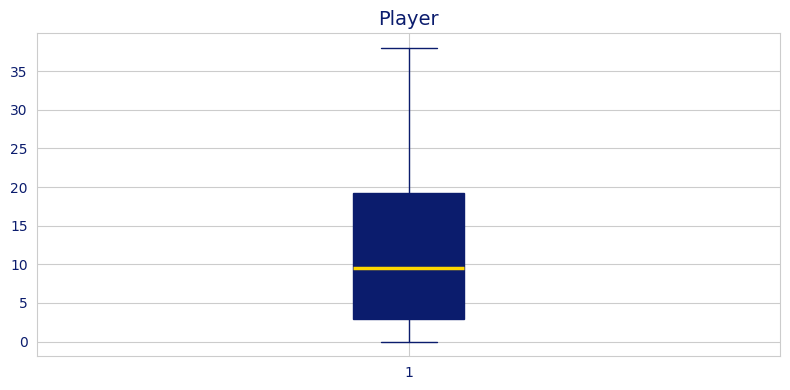

In [64]:
azul_boca = '#0B1C6D'
amarillo_boca = '#FFD700'


fig, ax = plt.subplots(figsize=(8, 4))


ax.boxplot(dfx['stats_90s'], patch_artist=True,
           boxprops=dict(facecolor=azul_boca, color=azul_boca),
           capprops=dict(color=azul_boca),
           whiskerprops=dict(color=azul_boca),
           flierprops=dict(markerfacecolor=amarillo_boca, markeredgecolor=azul_boca),
           medianprops=dict(color=amarillo_boca, linewidth=2.5))


ax.set_title('Player', color=azul_boca, fontsize=14)
ax.tick_params(colors=azul_boca)

plt.tight_layout()
plt.show()

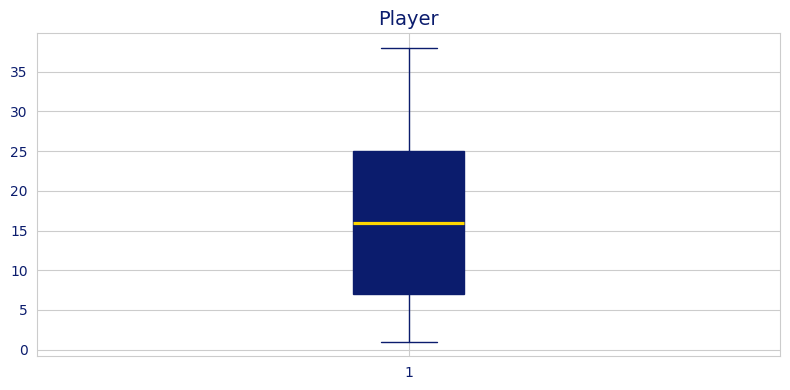

In [65]:
fig, ax = plt.subplots(figsize=(8, 4))


ax.boxplot(dfx['stats_MP'], patch_artist=True,
           boxprops=dict(facecolor=azul_boca, color=azul_boca),
           capprops=dict(color=azul_boca),
           whiskerprops=dict(color=azul_boca),
           flierprops=dict(markerfacecolor=amarillo_boca, markeredgecolor=azul_boca),
           medianprops=dict(color=amarillo_boca, linewidth=2.3))


ax.set_title('Player', color=azul_boca, fontsize=14)
ax.tick_params(colors=azul_boca)

plt.tight_layout()
plt.show()

In [66]:
dfx['stats_MP'].mean()

np.float64(16.228506787330318)

In [67]:
dfx['stats_MP'].quantile(0.25)

np.float64(7.0)

In [68]:
dfx['stats_MP'].describe()

,stats_MP
count,2652.000000
mean,16.228507
std,10.309205
min,1.000000
25%,7.000000
50%,16.000000
75%,25.000000
max,38.000000


In [69]:
dfx.shape

(2652, 179)

In [70]:
correlation_matrixP = dfx[['stats_Gls', 'stats_Ast', 'stats_G+A']].corr(method='pearson')
correlation_matrixP

,stats_Gls,stats_Ast,stats_G+A
stats_Gls,1.000000,0.551521,0.930876
stats_Ast,0.551521,1.000000,0.818147
stats_G+A,0.930876,0.818147,1.000000


In [71]:
correlation_matrix = dfx[['stats_Gls', 'stats_Ast', 'stats_G+A']].corr(method='spearman')
correlation_matrix

,stats_Gls,stats_Ast,stats_G+A
stats_Gls,1.000000,0.532754,0.878389
stats_Ast,0.532754,1.000000,0.827812
stats_G+A,0.878389,0.827812,1.000000


In [72]:
correlation_matrix2 = dfx[['shooting_Gls', 'shooting_Sh', 'shooting_Dist']].corr(method='pearson')
correlation_matrix2

,shooting_Gls,shooting_Sh,shooting_Dist
shooting_Gls,1.000000,0.836316,0.149708
shooting_Sh,0.836316,1.000000,0.316378
shooting_Dist,0.149708,0.316378,1.000000


In [73]:
correlation_matrix2 = dfx[['shooting_Gls', 'shooting_Sh', 'shooting_Dist']].corr(method='spearman')
print(correlation_matrix2)

               shooting_Gls  shooting_Sh  shooting_Dist
shooting_Gls       1.000000     0.760904       0.185406
shooting_Sh        0.760904     1.000000       0.502283
shooting_Dist      0.185406     0.502283       1.000000


In [74]:
correlation_matrix3 = dfx[['passing_types_Att','passing_types_Live','passing_types_Dead']].corr(method='pearson')
print(correlation_matrix3)

                    passing_types_Att  passing_types_Live  passing_types_Dead
passing_types_Att            1.000000            0.989804            0.636259
passing_types_Live           0.989804            1.000000            0.519931
passing_types_Dead           0.636259            0.519931            1.000000


In [75]:
correlation_matrix3 = dfx[['passing_types_Att','passing_types_Live','passing_types_Dead']].corr(method='spearman')
print(correlation_matrix3)

                    passing_types_Att  passing_types_Live  passing_types_Dead
passing_types_Att            1.000000            0.994543            0.833703
passing_types_Live           0.994543            1.000000            0.783877
passing_types_Dead           0.833703            0.783877            1.000000


In [76]:
correlation_matrix4 = dfx[['passing_TotDist', 'passing_PrgDist', 'passing_Ast', 'passing_1/3','possession_Def Pen','possession_Mid 3rd','possession_Att 3rd']].corr(method='pearson')
correlation_matrix4

,passing_TotDist,passing_PrgDist,passing_Ast,passing_1/3,possession_Def Pen,possession_Mid 3rd,possession_Att 3rd
passing_TotDist,1.000000,0.904930,0.347057,0.826552,0.506855,0.843296,0.389635
passing_PrgDist,0.904930,1.000000,0.181743,0.602679,0.787549,0.573440,0.179549
passing_Ast,0.347057,0.181743,1.000000,0.479591,-0.091931,0.475970,0.773141
passing_1/3,0.826552,0.602679,0.479591,1.000000,0.067707,0.942781,0.581489
possession_Def Pen,0.506855,0.787549,-0.091931,0.067707,1.000000,0.016285,-0.164433
possession_Mid 3rd,0.843296,0.573440,0.475970,0.942781,0.016285,1.000000,0.600203
possession_Att 3rd,0.389635,0.179549,0.773141,0.581489,-0.164433,0.600203,1.000000


In [77]:
correlation_matrix4 = dfx[['passing_TotDist', 'passing_PrgDist', 'passing_Ast', 'passing_1/3','possession_Def Pen','possession_Mid 3rd','possession_Att 3rd']].corr(method='spearman')
print(correlation_matrix4)

                    passing_TotDist  passing_PrgDist  passing_Ast  \
passing_TotDist            1.000000         0.974016     0.431743   
passing_PrgDist            0.974016         1.000000     0.344004   
passing_Ast                0.431743         0.344004     1.000000   
passing_1/3                0.900514         0.838666     0.526630   
possession_Def Pen         0.823284         0.875346     0.161411   
possession_Mid 3rd         0.818987         0.722038     0.552454   
possession_Att 3rd         0.496144         0.372779     0.694525   

                    passing_1/3  possession_Def Pen  possession_Mid 3rd  \
passing_TotDist        0.900514            0.823284            0.818987   
passing_PrgDist        0.838666            0.875346            0.722038   
passing_Ast            0.526630            0.161411            0.552454   
passing_1/3            1.000000            0.611627            0.938202   
possession_Def Pen     0.611627            1.000000            0.524497 

In [78]:
correlation_matrix5 = dfx[['passing_TotDist', 'passing_PrgDist', 'passing_Ast', 'passing_1/3','possession_Def Pen','possession_Mid 3rd','possession_Att 3rd','stats_Gls', 'stats_Ast', 'stats_G+A']].corr(method='pearson')
print(correlation_matrix5)

                    passing_TotDist  passing_PrgDist  passing_Ast  \
passing_TotDist            1.000000         0.904930     0.347057   
passing_PrgDist            0.904930         1.000000     0.181743   
passing_Ast                0.347057         0.181743     1.000000   
passing_1/3                0.826552         0.602679     0.479591   
possession_Def Pen         0.506855         0.787549    -0.091931   
possession_Mid 3rd         0.843296         0.573440     0.475970   
possession_Att 3rd         0.389635         0.179549     0.773141   
stats_Gls                  0.131996         0.001193     0.551521   
stats_Ast                  0.347057         0.181743     1.000000   
stats_G+A                  0.242989         0.080420     0.818147   

                    passing_1/3  possession_Def Pen  possession_Mid 3rd  \
passing_TotDist        0.826552            0.506855            0.843296   
passing_PrgDist        0.602679            0.787549            0.573440   
passing_Ast    

In [79]:
correlation_matrix5 = dfx[['passing_TotDist', 'passing_PrgDist', 'passing_Ast', 'passing_1/3','possession_Def Pen','possession_Mid 3rd','possession_Att 3rd','stats_Gls', 'stats_Ast', 'stats_G+A']].corr(method='spearman')
print(correlation_matrix5)

                    passing_TotDist  passing_PrgDist  passing_Ast  \
passing_TotDist            1.000000         0.974016     0.431743   
passing_PrgDist            0.974016         1.000000     0.344004   
passing_Ast                0.431743         0.344004     1.000000   
passing_1/3                0.900514         0.838666     0.526630   
possession_Def Pen         0.823284         0.875346     0.161411   
possession_Mid 3rd         0.818987         0.722038     0.552454   
possession_Att 3rd         0.496144         0.372779     0.694525   
stats_Gls                  0.317480         0.207915     0.532754   
stats_Ast                  0.431743         0.344004     1.000000   
stats_G+A                  0.438766         0.323907     0.827812   

                    passing_1/3  possession_Def Pen  possession_Mid 3rd  \
passing_TotDist        0.900514            0.823284            0.818987   
passing_PrgDist        0.838666            0.875346            0.722038   
passing_Ast    

In [80]:
correlation_matrix6 = dfx[['passing_TotDist', 'passing_PrgDist', 'passing_Ast', 'passing_1/3','possession_Def Pen','possession_Mid 3rd','possession_Att 3rd','shooting_Gls', 'shooting_Sh', 'shooting_Dist']].corr(method='pearson')
correlation_matrix6

,passing_TotDist,passing_PrgDist,passing_Ast,passing_1/3,possession_Def Pen,possession_Mid 3rd,possession_Att 3rd,shooting_Gls,shooting_Sh,shooting_Dist
passing_TotDist,1.000000,0.904930,0.347057,0.826552,0.506855,0.843296,0.389635,0.131996,0.282767,0.185713
passing_PrgDist,0.904930,1.000000,0.181743,0.602679,0.787549,0.573440,0.179549,0.001193,0.095923,-0.000695
passing_Ast,0.347057,0.181743,1.000000,0.479591,-0.091931,0.475970,0.773141,0.551521,0.666930,0.277036
passing_1/3,0.826552,0.602679,0.479591,1.000000,0.067707,0.942781,0.581489,0.223301,0.427908,0.395057
possession_Def Pen,0.506855,0.787549,-0.091931,0.067707,1.000000,0.016285,-0.164433,-0.104742,-0.131017,-0.292849
possession_Mid 3rd,0.843296,0.573440,0.475970,0.942781,0.016285,1.000000,0.600203,0.262756,0.463880,0.428486
possession_Att 3rd,0.389635,0.179549,0.773141,0.581489,-0.164433,0.600203,1.000000,0.630503,0.806881,0.411951
shooting_Gls,0.131996,0.001193,0.551521,0.223301,-0.104742,0.262756,0.630503,1.000000,0.836316,0.149708
shooting_Sh,0.282767,0.095923,0.666930,0.427908,-0.131017,0.463880,0.806881,0.836316,1.000000,0.316378
shooting_Dist,0.185713,-0.000695,0.277036,0.395057,-0.292849,0.428486,0.411951,0.149708,0.316378,1.000000


In [81]:
correlation_matrix6 = dfx[['passing_TotDist', 'passing_PrgDist', 'passing_Ast', 'passing_1/3','possession_Def Pen','possession_Mid 3rd','possession_Att 3rd','defense_Def 3rd','defense_Mid 3rd','defense_Att 3rd','defense_Att','defense_Tkl%']].corr(method='pearson')
correlation_matrix6

,passing_TotDist,passing_PrgDist,passing_Ast,passing_1/3,possession_Def Pen,possession_Mid 3rd,possession_Att 3rd,defense_Def 3rd,defense_Mid 3rd,defense_Att 3rd,defense_Att,defense_Tkl%
passing_TotDist,1.000000,0.904930,0.347057,0.826552,0.506855,0.843296,0.389635,0.676676,0.569284,0.337597,0.645476,0.242287
passing_PrgDist,0.904930,1.000000,0.181743,0.602679,0.787549,0.573440,0.179549,0.520001,0.355405,0.159825,0.431573,0.192727
passing_Ast,0.347057,0.181743,1.000000,0.479591,-0.091931,0.475970,0.773141,0.255589,0.393904,0.509759,0.426937,0.006292
passing_1/3,0.826552,0.602679,0.479591,1.000000,0.067707,0.942781,0.581489,0.666628,0.726395,0.513023,0.768006,0.192075
possession_Def Pen,0.506855,0.787549,-0.091931,0.067707,1.000000,0.016285,-0.164433,0.066447,-0.066700,-0.130501,-0.033690,0.027275
...,...,...,...,...,...,...,...,...,...,...,...,...
defense_Def 3rd,0.676676,0.520001,0.255589,0.666628,0.066447,0.771707,0.378790,1.000000,0.744542,0.437641,0.853761,0.356201
defense_Mid 3rd,0.569284,0.355405,0.393904,0.726395,-0.066700,0.797840,0.558779,0.744542,1.000000,0.629955,0.898691,0.218949
defense_Att 3rd,0.337597,0.159825,0.509759,0.513023,-0.130501,0.549686,0.728576,0.437641,0.629955,1.000000,0.661730,0.101942
defense_Att,0.645476,0.431573,0.426937,0.768006,-0.033690,0.843142,0.604324,0.853761,0.898691,0.661730,1.000000,0.220320


In [82]:
correlation_matrix6 = dfx[['passing_TotDist', 'passing_PrgDist', 'passing_Ast', 'passing_1/3','possession_Def Pen','possession_Mid 3rd','possession_Att 3rd','defense_Def 3rd','defense_Mid 3rd','defense_Att 3rd','defense_Att','defense_Tkl%']].corr(method='spearman')
print(correlation_matrix6)

                    passing_TotDist  passing_PrgDist  passing_Ast  \
passing_TotDist            1.000000         0.974016     0.431743   
passing_PrgDist            0.974016         1.000000     0.344004   
passing_Ast                0.431743         0.344004     1.000000   
passing_1/3                0.900514         0.838666     0.526630   
possession_Def Pen         0.823284         0.875346     0.161411   
...                             ...              ...          ...   
defense_Def 3rd            0.749809         0.711272     0.390784   
defense_Mid 3rd            0.677633         0.594390     0.521758   
defense_Att 3rd            0.450620         0.355154     0.536149   
defense_Att                0.746837         0.671165     0.530062   
defense_Tkl%               0.330120         0.337226     0.033576   

                    passing_1/3  possession_Def Pen  possession_Mid 3rd  \
passing_TotDist        0.900514            0.823284            0.818987   
passing_PrgDist      

In [83]:
dfx[['shooting_Gls','shooting_Sh','passing_Cmp','passing_PrgDist','passing_types_Att','passing_types_Live','possession_Def Pen','possession_Mid 3rd','defense_Def 3rd','defense_Mid 3rd']]

,shooting_Gls,shooting_Sh,passing_Cmp,passing_PrgDist,passing_types_Att,passing_types_Live,possession_Def Pen,possession_Mid 3rd,defense_Def 3rd,defense_Mid 3rd
0,6,29,213,566,319,283,12,187,0,2
1,3,30,660,3688,851,841,28,691,16,27
2,0,14,317,1689,448,363,1,273,4,8
3,0,2,57,517,70,68,29,29,4,0
4,0,18,754,4776,925,897,53,696,21,14
...,...,...,...,...,...,...,...,...,...,...
3007,0,0,0,0,1,1,1,2,0,2
3010,0,7,631,2588,770,746,34,635,9,20
3011,0,0,0,0,1,1,0,1,0,1
3012,8,56,739,3447,944,854,10,543,12,19


In [84]:
Est_selecionadas = ['shooting_Gls','shooting_Sh','passing_Cmp','passing_PrgDist','passing_types_Att','passing_types_Live','possession_Def Pen','possession_Mid 3rd','defense_Def 3rd','defense_Mid 3rd']

##ALGORITMOS SUPERVISADOS

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

== Árbol de Decisión ==
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       331
           1       0.79      0.82      0.80       200

    accuracy                           0.85       531
   macro avg       0.84      0.84      0.84       531
weighted avg       0.85      0.85      0.85       531



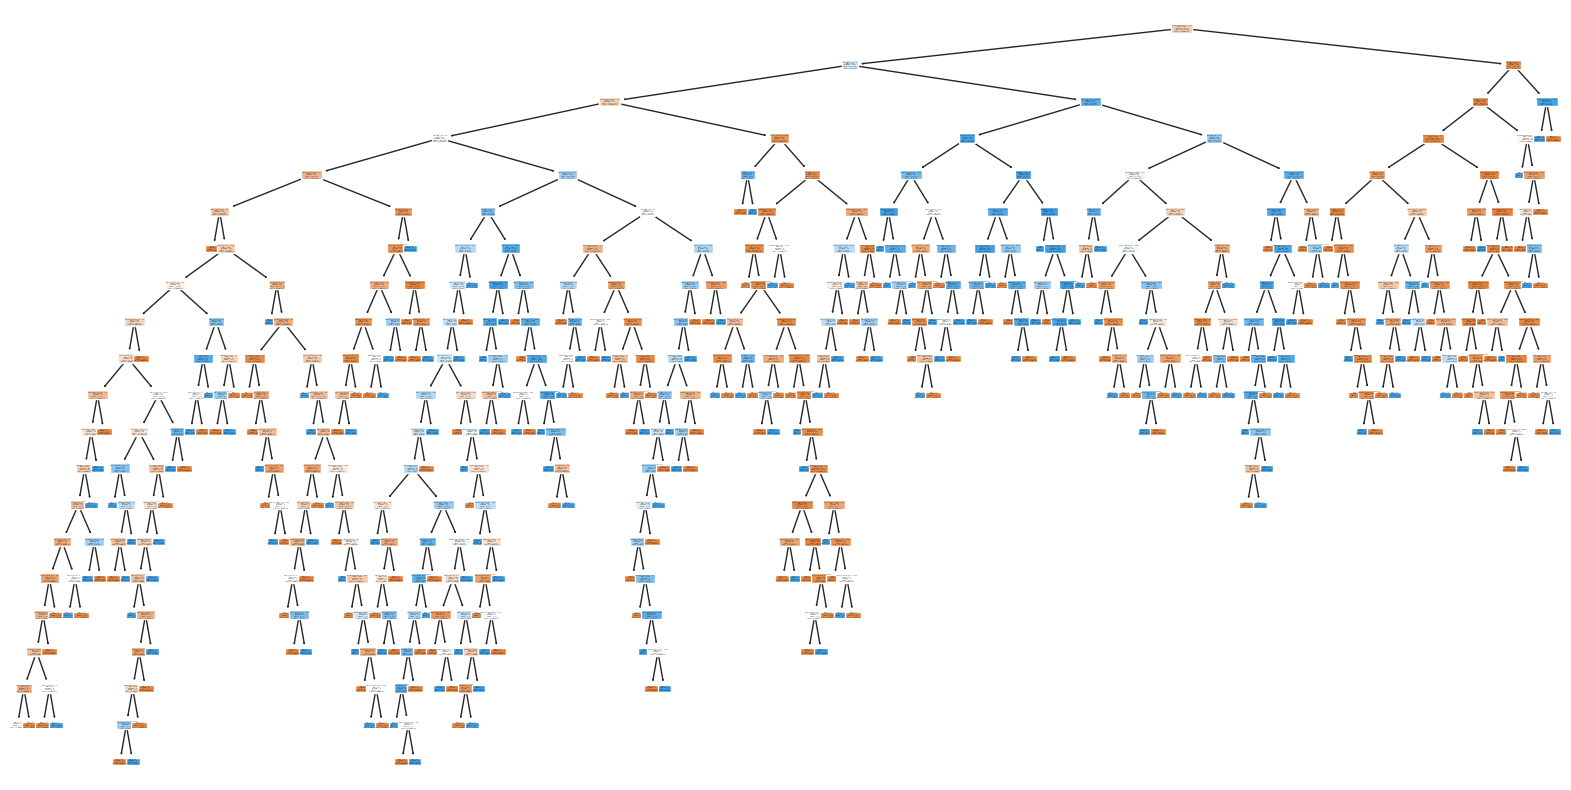

In [88]:
X = dfx[Est_selecionadas]                                                                                        # Arbol
y = dfx['stats_Pos'].apply(lambda x: 1 if 'FW' in x else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


y_pred_tree = tree_model.predict(X_test)


print("== Árbol de Decisión ==")
print(classification_report(y_test, y_pred_tree))


plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['No Delantero', 'Delantero'], filled=True)
plt.show()

== Árbol de Decisión ==
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       333
           1       0.83      0.84      0.83       198

    accuracy                           0.88       531
   macro avg       0.87      0.87      0.87       531
weighted avg       0.88      0.88      0.88       531



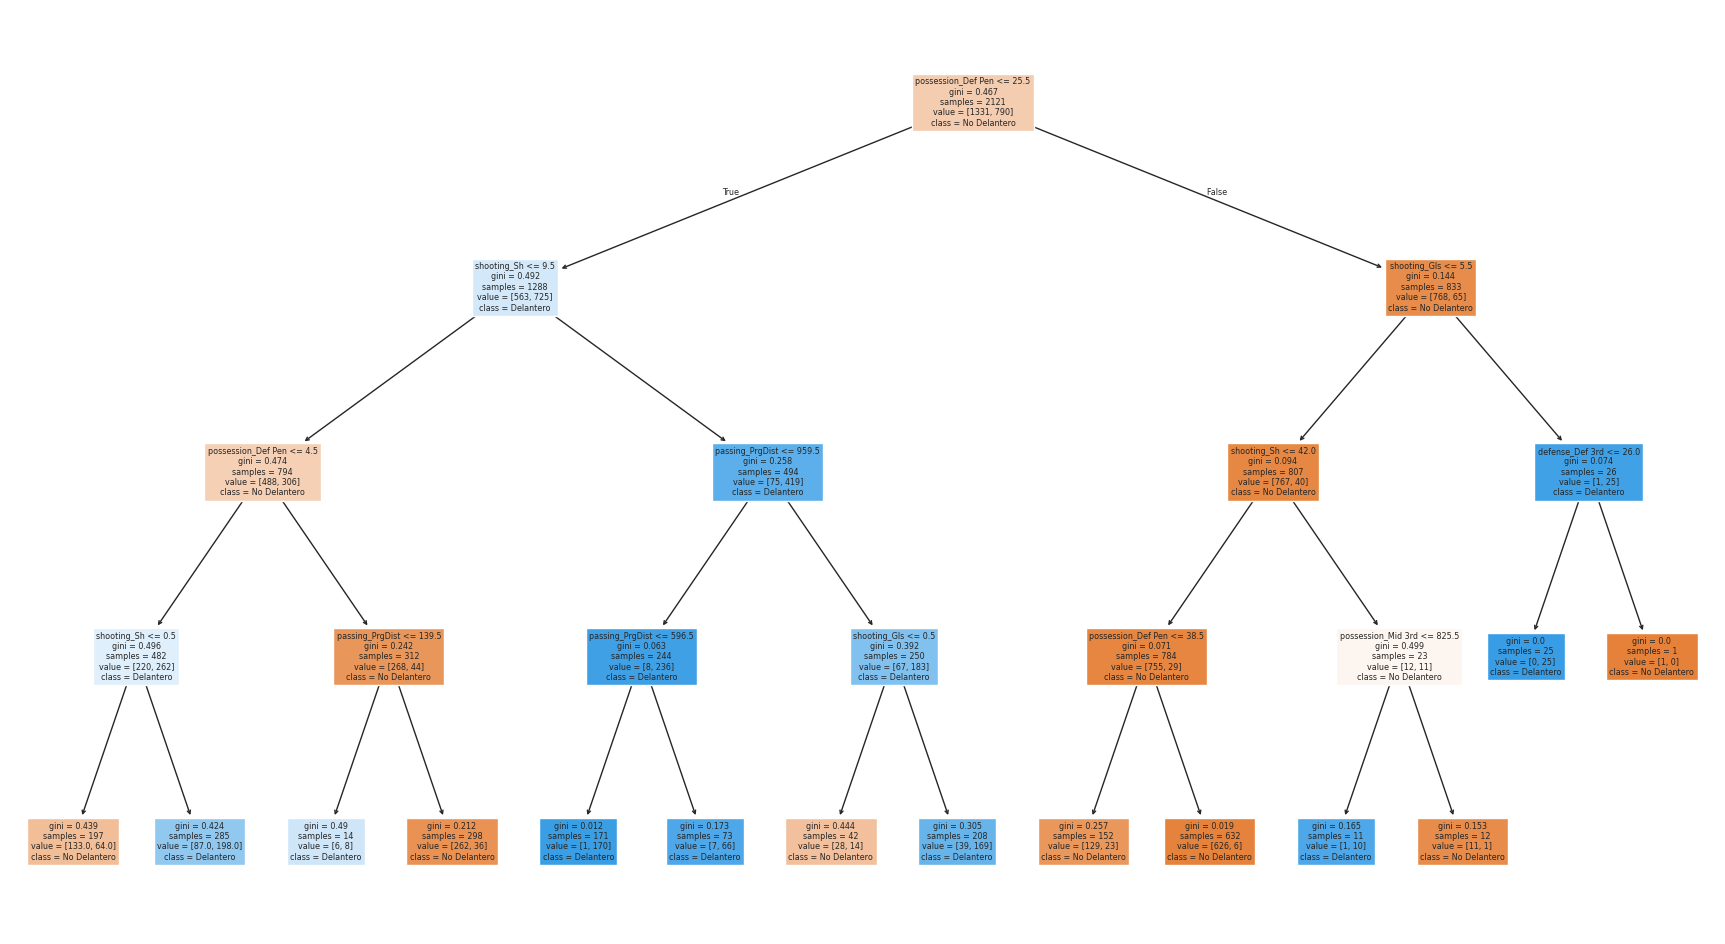

In [86]:
                                                                                                               # Árbol de Decisión X


X = dfx[Est_selecionadas]
y = dfx['stats_Pos'].apply(lambda x: 1 if 'FW' in x else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)


y_pred_tree = tree_model.predict(X_test)


print("== Árbol de Decisión ==")
print(classification_report(y_test, y_pred_tree))


plt.figure(figsize=(22,12))
plot_tree(tree_model, feature_names=X.columns, class_names=['No Delantero', 'Delantero'], filled=True)
plt.show()

F1 Score: 0.803921568627451


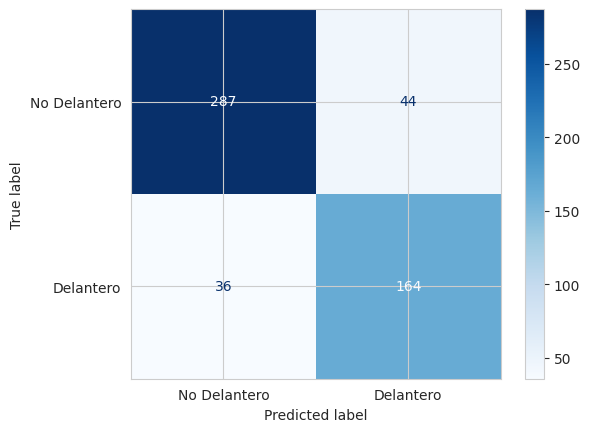

In [93]:

f = f1_score(y_test, y_pred_tree)
print("F1 Score:", f)


cm = confusion_matrix(y_test, y_pred_tree)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Delantero', 'Delantero'])
disp.plot(cmap='Blues')
plt.show()

In [96]:
                                                                                           # Random Forest X
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


print("== Random Forest ==")
print(classification_report(y_test, y_pred_rf))



feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("Importancia de las variables:")
print(feature_importance)


== Random Forest ==
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       331
           1       0.85      0.84      0.85       200

    accuracy                           0.89       531
   macro avg       0.88      0.88      0.88       531
weighted avg       0.89      0.89      0.89       531

Importancia de las variables:
              feature  importance
6  possession_Def Pen    0.209599
1         shooting_Sh    0.182174
3     passing_PrgDist    0.153192
0        shooting_Gls    0.108970
2         passing_Cmp    0.070778
7  possession_Mid 3rd    0.067081
4   passing_types_Att    0.063310
5  passing_types_Live    0.062625
8     defense_Def 3rd    0.050111
9     defense_Mid 3rd    0.032160


F1 Score: 0.8471177944862155


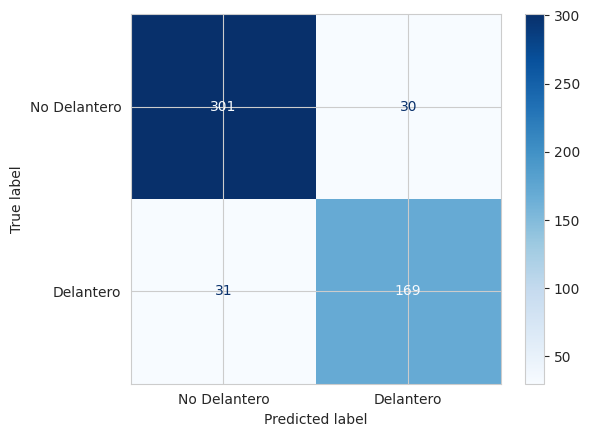

In [97]:
                                                                                                       # Calcular el F1 Score y matriz de confusion
f = f1_score(y_test, y_pred_rf)
print("F1 Score:", f)


cm = confusion_matrix(y_test, y_pred_rf)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Delantero', 'Delantero'])
disp.plot(cmap='Blues')
plt.show()

In [98]:
importances = tree_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Variable': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df

,Variable,Importance
6,possession_Def Pen,0.343501
1,shooting_Sh,0.223066
3,passing_PrgDist,0.096407
7,possession_Mid 3rd,0.088265
0,shooting_Gls,0.064234
4,passing_types_Att,0.052251
2,passing_Cmp,0.043297
5,passing_types_Live,0.038424
8,defense_Def 3rd,0.027673
9,defense_Mid 3rd,0.022881


In [99]:
from sklearn.model_selection import cross_val_score

                                                                                           # Validación cruzada - Árbol de Decisión
tree_cv_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5)
print("CV Accuracy - Árbol de Decisión:", tree_cv_scores.mean())

                                                                                           # Validación cruzada - Random Forest
rf_cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5)
print("CV Accuracy - Random Forest:", rf_cv_scores.mean())


CV Accuracy - Árbol de Decisión: 0.8201492378211279
CV Accuracy - Random Forest: 0.8616210069999644


##Ingeniera de atributos

In [100]:
dfx_F = dfx[dfx['stats_90s'] > 9]                                                         #Filtro

In [101]:
dfx_F.shape

(1362, 179)

In [102]:
dfx_F[Est_selecionadas]

,shooting_Gls,shooting_Sh,passing_Cmp,passing_PrgDist,passing_types_Att,passing_types_Live,possession_Def Pen,possession_Mid 3rd,defense_Def 3rd,defense_Mid 3rd
0,6,29,213,566,319,283,12,187,0,2
1,3,30,660,3688,851,841,28,691,16,27
2,0,14,317,1689,448,363,1,273,4,8
4,0,18,754,4776,925,897,53,696,21,14
5,0,11,222,1053,296,284,12,232,6,9
...,...,...,...,...,...,...,...,...,...,...
3003,3,2,881,20721,1184,868,1106,9,1,0
3006,0,42,583,2507,774,735,22,454,9,17
3010,0,7,631,2588,770,746,34,635,9,20
3012,8,56,739,3447,944,854,10,543,12,19


In [103]:
X1 = dfx_F[Est_selecionadas]
y1 = dfx_F['stats_Pos'].apply(lambda x: 1 if 'FW' in x else 0)


== Árbol de Decisión ==
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       187
           1       0.87      0.88      0.88        86

    accuracy                           0.92       273
   macro avg       0.91      0.91      0.91       273
weighted avg       0.92      0.92      0.92       273



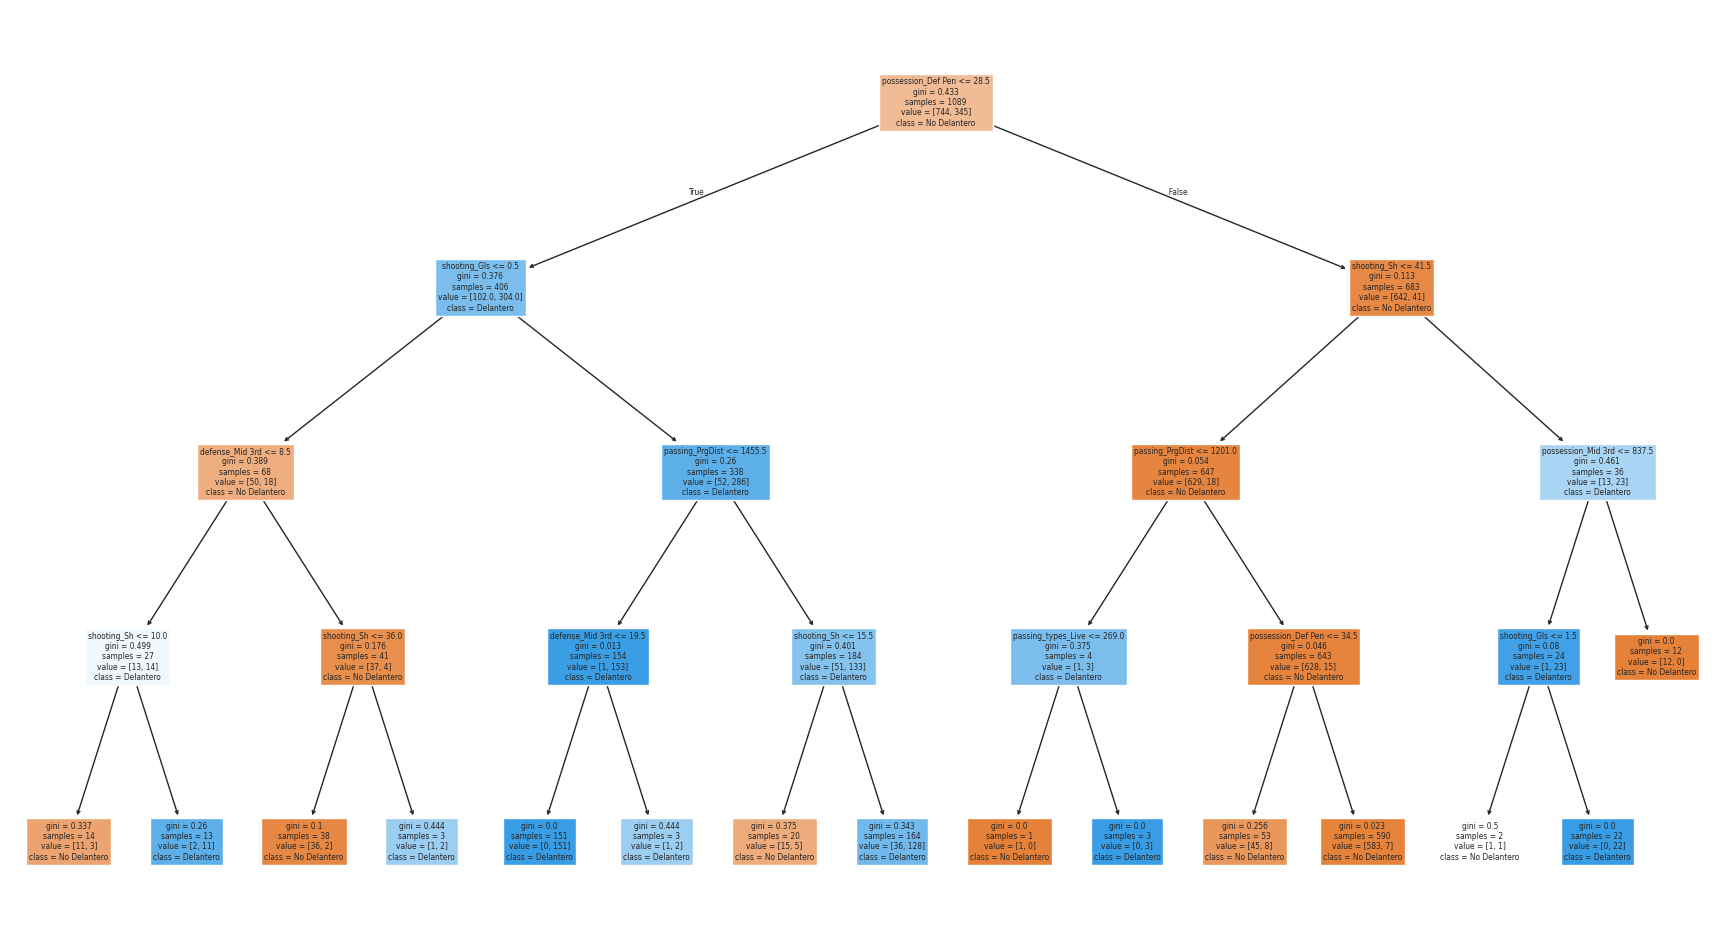

In [104]:
                                                                                                         #Arbol X1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X1_train, y1_train)



y1_pred_tree = tree_model.predict(X1_test)


print("== Árbol de Decisión ==")
print(classification_report(y1_test, y1_pred_tree))


plt.figure(figsize=(22,12))
plot_tree(tree_model, feature_names=X.columns, class_names=['No Delantero', 'Delantero'], filled=True)
plt.show()

In [105]:
y.value_counts()

,count
stats_Pos,
0,1664
1,988


In [106]:
print(y.value_counts(normalize=True))

stats_Pos
0    0.627451
1    0.372549
Name: proportion, dtype: float64


In [107]:
y1_test.value_counts()

,count
stats_Pos,
0,187
1,86


F1 Score: 0.8786127167630058


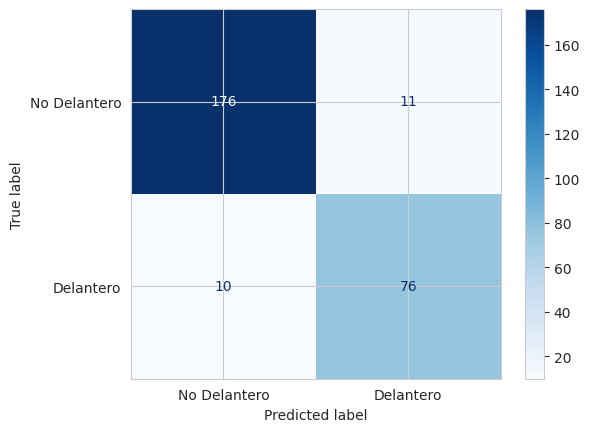

In [108]:
                                                                                                     # Calcular el F1 Score y matriz de confusion
f1 = f1_score(y1_test, y1_pred_tree)
print("F1 Score:", f1)


cm = confusion_matrix(y1_test, y1_pred_tree)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Delantero', 'Delantero'])
disp.plot(cmap='Blues')
plt.show()

In [109]:
print(y1_test.value_counts(normalize=True))

stats_Pos
0    0.684982
1    0.315018
Name: proportion, dtype: float64


In [110]:
                                                                                  # Random Forest X1
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X1_train, y1_train)


y1_pred_rf = rf_model.predict(X1_test)


print("== Random Forest ==")
print(classification_report(y1_test, y1_pred_rf))



feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("Importancia de las variables:")
print(feature_importance)

== Random Forest ==
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       187
           1       0.92      0.88      0.90        86

    accuracy                           0.94       273
   macro avg       0.93      0.92      0.93       273
weighted avg       0.94      0.94      0.94       273

Importancia de las variables:
              feature  importance
6  possession_Def Pen    0.281175
3     passing_PrgDist    0.177979
1         shooting_Sh    0.154675
0        shooting_Gls    0.150831
2         passing_Cmp    0.054623
4   passing_types_Att    0.043015
7  possession_Mid 3rd    0.039985
8     defense_Def 3rd    0.035852
5  passing_types_Live    0.034676
9     defense_Mid 3rd    0.027189


F1 Score: 0.8994082840236687


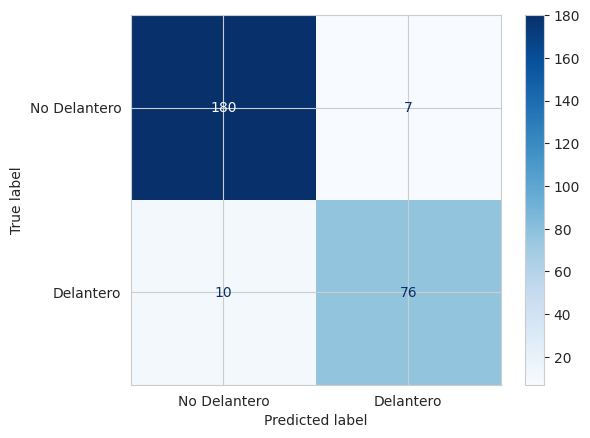

In [111]:

f1 = f1_score(y1_test, y1_pred_rf)
print("F1 Score:", f1)


cm = confusion_matrix(y1_test, y1_pred_rf)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Delantero', 'Delantero'])
disp.plot(cmap='Blues')
plt.show()

In [112]:
# Validación cruzada - Árbol de Decisión1
tree_cv_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X1, y1, cv=5)
print("CV Accuracy - Árbol de Decisión:", tree_cv_scores.mean())

# Validación cruzada - Random Forest1
rf_cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X1, y1, cv=5)
print("CV Accuracy - Random Forest:", rf_cv_scores.mean())

CV Accuracy - Árbol de Decisión: 0.8854745744451626
CV Accuracy - Random Forest: 0.925859189829778


In [113]:
importances1 = tree_model.feature_importances_
feature_names = X1_train.columns
importance_df = pd.DataFrame({'Variable': feature_names, 'Importance1': importances1})
importance_df = importance_df.sort_values('Importance1', ascending=False)
importance_df

,Variable,Importance1
6,possession_Def Pen,0.667496
1,shooting_Sh,0.117840
0,shooting_Gls,0.107461
3,passing_PrgDist,0.045192
7,possession_Mid 3rd,0.040288
9,defense_Mid 3rd,0.017611
5,passing_types_Live,0.004113
2,passing_Cmp,0.000000
4,passing_types_Att,0.000000
8,defense_Def 3rd,0.000000


##Ahora con la seleccion de supuestas mejores estadisticas.

In [114]:

seleccion_F = ['possession_Def Pen', 'shooting_Sh', 'shooting_Gls','passing_PrgDist']


X2 = dfx_F[seleccion_F]


y2 = dfx_F['stats_Pos'].apply(lambda x: 1 if 'FW' in x else 0)




X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


== Árbol de Decisión ==
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       187
           1       0.88      0.90      0.89        86

    accuracy                           0.93       273
   macro avg       0.91      0.92      0.92       273
weighted avg       0.93      0.93      0.93       273



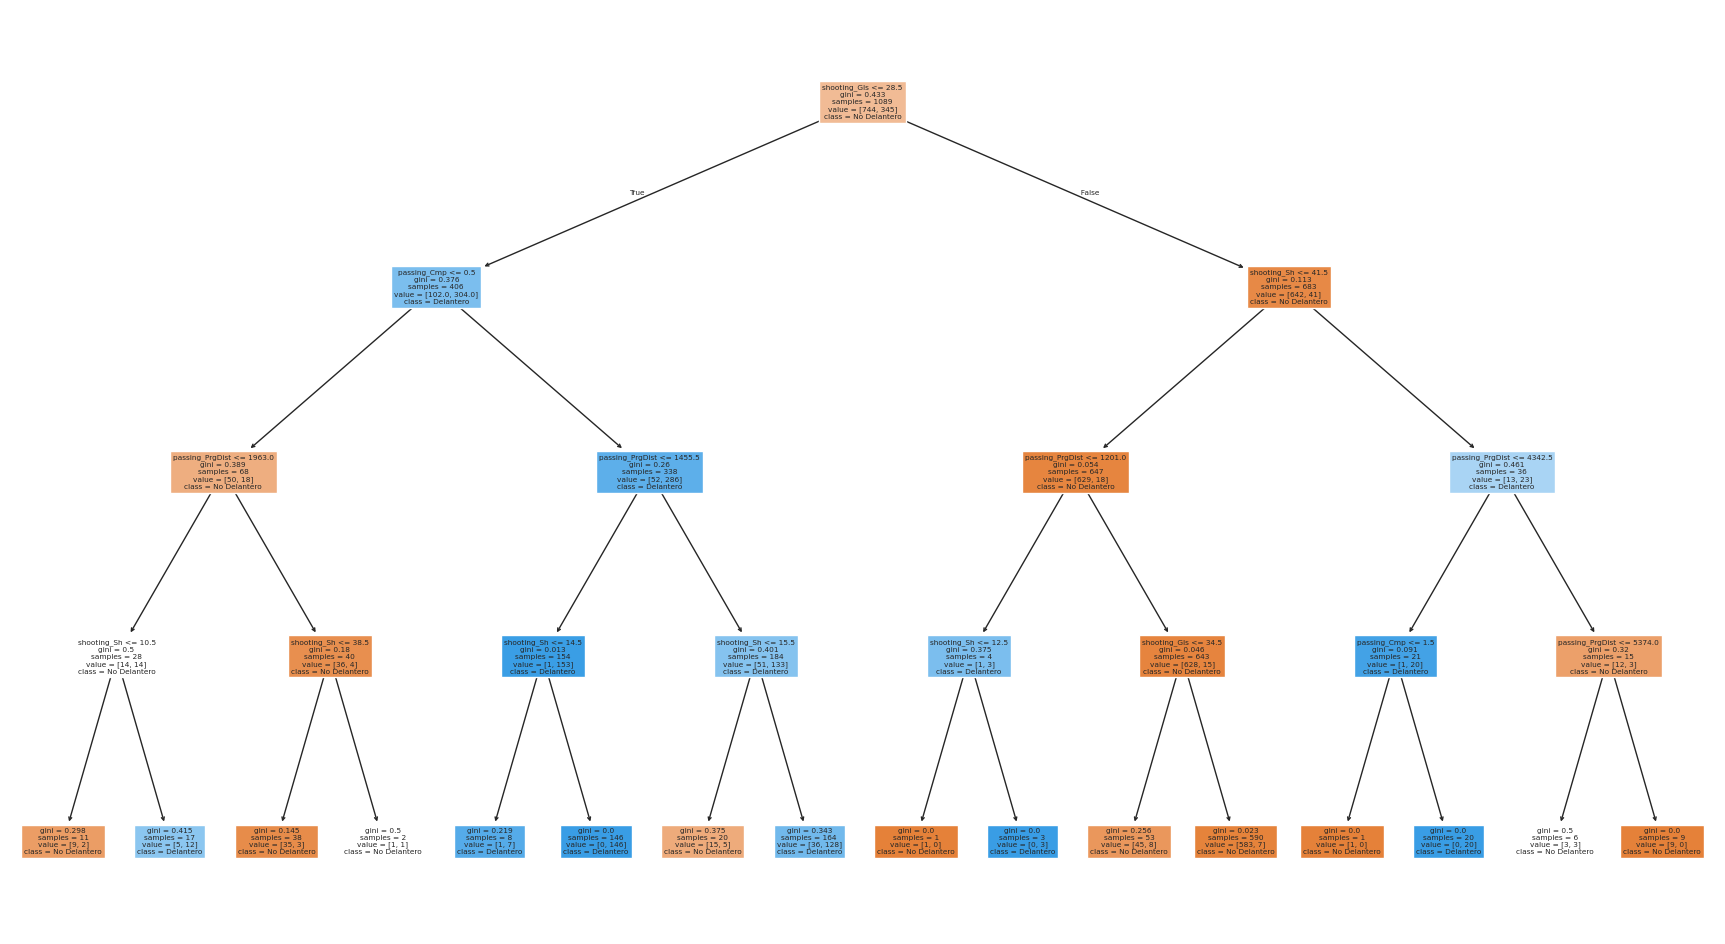

In [115]:
                                                                                                          #Arbol x2
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X2_train, y2_train)




y2_pred_tree = tree_model.predict(X2_test)


print("== Árbol de Decisión ==")
print(classification_report(y2_test, y2_pred_tree))


plt.figure(figsize=(22,12))
plot_tree(tree_model, feature_names=X.columns, class_names=['No Delantero', 'Delantero'], filled=True)
plt.show()

F1 Score: 0.8850574712643678


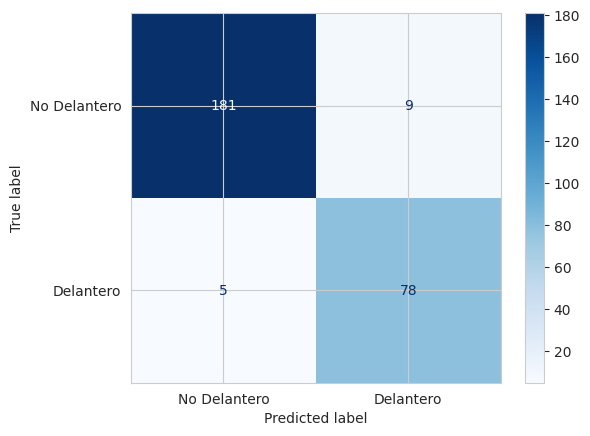

In [117]:
                                                                                                        # Calcular el F1 Score y matriz de confusion
f1 = f1_score(y2_test, y2_pred_tree)
print("F1 Score:", f1)


cm = confusion_matrix(y1_pred_rf, y1_pred_tree)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Delantero', 'Delantero'])
disp.plot(cmap='Blues')
plt.show()

In [118]:
                                                                                                        # Random Forest X2
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X2_train, y2_train)


y2_pred_rf = rf_model.predict(X2_test)


print("== Random Forest ==")
print(classification_report(y2_test, y2_pred_rf))

# Importancia de features

feature_importance = pd.DataFrame({
    'feature': X2.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("Importancia de las variables:")
print(feature_importance)

== Random Forest ==
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       187
           1       0.92      0.90      0.91        86

    accuracy                           0.94       273
   macro avg       0.93      0.93      0.93       273
weighted avg       0.94      0.94      0.94       273

Importancia de las variables:
              feature  importance
0  possession_Def Pen    0.417577
3     passing_PrgDist    0.280040
1         shooting_Sh    0.162877
2        shooting_Gls    0.139506


In [119]:
# Validación cruzada - Árbol de Decisión
tree_cv_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X2, y2, cv=5)
print("CV Accuracy - Árbol de Decisión:", tree_cv_scores.mean())

# Validación cruzada - Random Forest
rf_cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X2, y2, cv=5)
print("CV Accuracy - Random Forest:", rf_cv_scores.mean())

CV Accuracy - Árbol de Decisión: 0.8920841413488472
CV Accuracy - Random Forest: 0.9177817280758458


In [120]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

F1 Score: 0.8850574712643678


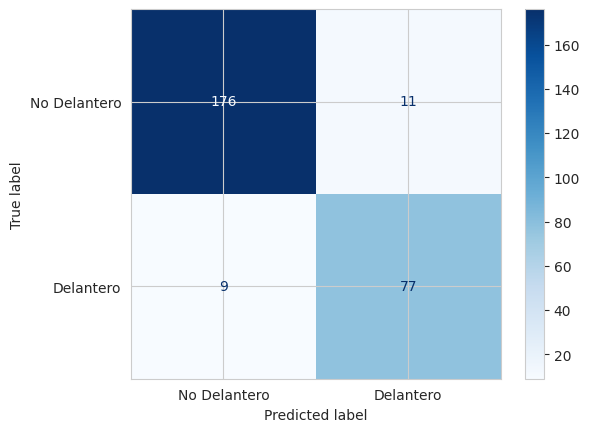

In [121]:

f1 = f1_score(y2_test, y2_pred_tree)
print("F1 Score:", f1)


cm = confusion_matrix(y2_test, y2_pred_tree)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Delantero', 'Delantero'])
disp.plot(cmap='Blues')
plt.show()

##AJUSTE DE HIPERPARAMETROS

In [122]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X2_train, y2_train)

print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor puntuación: ", grid_search.best_score_)

Mejores parámetros:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mejor puntuación:  0.9155202299919672


In [123]:
X3 = dfx_F[seleccion_F]
y3 = dfx_F['stats_Pos'].apply(lambda x: 1 if 'FW' in x else 0)
X3_train, X3_test, y3_train, y3_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [124]:
                                                                                                                       #Random Forest X2 Mejorado X3


rf_model_optimized = RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=2, random_state=42)


rf_model_optimized.fit(X3_train, y3_train)


y3_pred_rf_optimized = rf_model_optimized.predict(X3_test)

print("== Random Forest Optimizado ==")
print(classification_report(y3_test, y3_pred_rf_optimized))



feature_importance = pd.DataFrame({
    'feature': X2.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("Importancia de las variables:")
print(feature_importance)


== Random Forest Optimizado ==
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       187
           1       0.92      0.91      0.91        86

    accuracy                           0.95       273
   macro avg       0.94      0.93      0.94       273
weighted avg       0.94      0.95      0.94       273

Importancia de las variables:
              feature  importance
0  possession_Def Pen    0.417577
3     passing_PrgDist    0.280040
1         shooting_Sh    0.162877
2        shooting_Gls    0.139506


In [125]:
# Validación cruzada con Random Forest optimizado
rf_cv_scores = cross_val_score(rf_model_optimized, X3, y3, cv=5, scoring='f1')
print("F1 Score Promedio - Random Forest con X3:", rf_cv_scores.mean())

# Validación cruzada con Árbol de Decisión optimizado
tree_cv_scores = cross_val_score(rf_model_optimized, X3, y3, cv=5, scoring='f1')
print("F1 Score Promedio - Árbol de Decisión con X3:", tree_cv_scores.mean())

F1 Score Promedio - Random Forest con X3: 0.8754753971939142
F1 Score Promedio - Árbol de Decisión con X3: 0.8754753971939142


In [126]:
rf_mejorado = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)

# Evaluación cruzada con 5 folds, usando F1 como métrica
scores_rf = cross_val_score(rf_mejorado, X3, y3, cv=5, scoring='f1')

print("F1 scores por fold:", scores_rf)
print("F1 score promedio:", scores_rf.mean())

F1 scores por fold: [0.82352941 0.87951807 0.89655172 0.88888889 0.88888889]
F1 score promedio: 0.8754753971939142


In [127]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [128]:
y_prob = rf_model_optimized.predict_proba(X3_test)[:, 1]

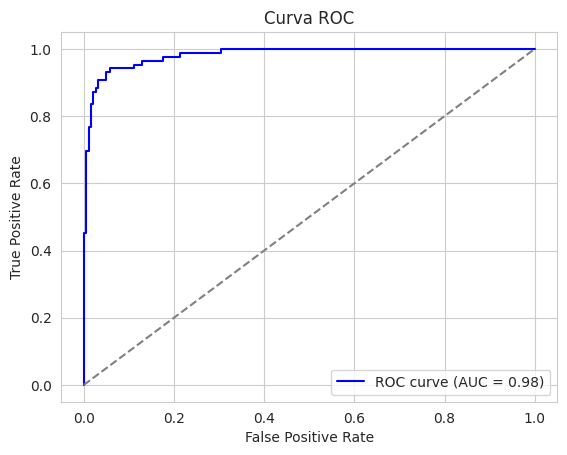

In [129]:
# 5. Calcular la curva ROC

y_prob = rf_model_optimized.predict_proba(X3_test)[:, 1]



fpr, tpr, thresholds = roc_curve(y3_test, y_prob)
roc_auc = auc(fpr, tpr)

# 6. Graficar
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [130]:
auc_score = roc_auc_score(y3_test, y_prob)  # y_prob es la probabilidad de la clase positiva (1)
print(f'AUC: {auc_score:.2f}')

AUC: 0.98


###Conclusion

La conclusion es que ambos modelos hacen un buen trabajo para diferenciar los jugadores de futbol delanteros de los no delanteros. El Random Forest es el mejor de los dos pero ambos parecen ajustar bien tanto en entrenamiento como testeo. Esto queda demostrado en las metricas, especialmente en F1 Score porque se trata de un data set algo devalanceado y en pos de mejorar esa cuestion es que se realizaron algunos ajustes.

De todas formas parece quedar lugar para mejoras sobre esta seleccion asi como tambien probar con otras selecciones de estadisticas diferentes.